<img src="./title-kaggle.gif"/>

#  <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**<ins>INTRODUCTION**</ins></span></span>


***Le projet Titanic sur Kaggle est une étude classique en science des données et en apprentissage automatique. L’objectif principal est de développer un modèle prédictif capable de déterminer si un passager a survécu au naufrage du Titanic en fonction de ses caractéristiques personnelles telles que l'âge, le sexe, la classe sociale, et d'autres informations.***

***Ce projet met l’accent sur plusieurs aspects essentiels :***

 ***Exploration et analyse des données : Comprendre la structure des données et identifier les relations clés entre les variables.***
 ***Préparation des données : Nettoyer les données, traiter les valeurs manquantes et transformer les variables pour les rendre exploitables par les modèles.***
 ***Modélisation : Construire et évaluer des modèles d’apprentissage automatique, tels que la régression logistique, les arbres de décision ou les forêts aléatoires, pour prédire la survie des passagers.***
 ***En travaillant sur ce projet, l’objectif est de maîtriser les étapes fondamentales d’un pipeline de machine learning tout en manipulant un dataset emblématique.***

<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

#  <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**1) <ins>STRATÉGIE GLOBALE**</ins></span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**a) Approche iterative**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Progression par étapes progressives**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Amélioration continue du modèle**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Test de différentes techniques**</span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**b) Phase de développement**</span></span>

<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

# <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**2) <ins>ITERATION 0**</ins></span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**a) Prediction où personne ne survit**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**b) Comprendre le taux de survit**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**c) Score de référence :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**~ 62% (taux de personnes qui ne survit pas)**</span>

---

* ## ⚠️ <span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>***Points importants à noter :***</span></span></span>

    - ### <span style='font-family:"Times New Roman"'> <span styel=''>Ce modèle servira de baseline</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>Il nous permet de comprendre le taux de survie réel</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>La précision sera probablement très basse (car tout le monde est prédit comme non survivant)</span></span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import xgboost as xgb
from sklearn.svm import SVC
import warnings

### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

Nous importons tout les imports pour le programme.

In [2]:
# Supprimer les avertissements spécifiques
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')
warnings.filterwarnings('ignore', category=FutureWarning)

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Charger les données**</ins></span></span>

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
print(f"Dimensions train : {train.shape}")
print(f"Dimensions test : {test.shape}\n")

print("Colonnes train :", train.columns.tolist())
print("Colonnes test :", test.columns.tolist(), "\n")

Dimensions train : (891, 12)
Dimensions test : (418, 11)

Colonnes train : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Colonnes test : ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 



### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

Maintenant nous chargeons les données utilisées.

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Méthode naive : prédire 0 (pas de survivant)**</ins></span></span>

In [5]:
predictions = np.zeros(len(test), dtype=int)

In [6]:
print(f"Nombre de prédictions (test) : {len(predictions)}")
print(f"Valeurs uniques dans predictions : {np.unique(predictions)}\n")

Nombre de prédictions (test) : 418
Valeurs uniques dans predictions : [0]



### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

Nous créons une variable où nous prédisons qu'il n'y aura aucun survivant.

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Calculer le score sur le jeu d'entraînement**</ins></span></span>

In [7]:
train_predictions = np.zeros(len(train), dtype=int)
baseline_accuracy = accuracy_score(train['Survived'], train_predictions)


In [8]:
print(f"Distribution vraie des survivants train :")
print(train['Survived'].value_counts(normalize=True))

Distribution vraie des survivants train :
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [9]:
print(f"\nPrécision du modèle de base : {baseline_accuracy:.2%}")


Précision du modèle de base : 61.62%


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧



---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Vérification manuelle du score**</ins></span></span>


In [10]:
manual_accuracy = (train['Survived'] == train_predictions).mean()


In [11]:
print(f"Vérification manuelle de la précision : {manual_accuracy:.2%}")
if abs(baseline_accuracy - manual_accuracy) < 0.0001:
    print("✅ Le score est correctement calculé\n")
else:
    print("❌ Erreur dans le calcul du score\n")

Vérification manuelle de la précision : 61.62%
✅ Le score est correctement calculé



---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Préparer le fichier de soumission**</ins></span></span>

In [12]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('data/baseline_submission.csv', index=False)

In [13]:
print("Vérification du format de soumission :")
print(f"Nombre de lignes : {len(submission)}")
print(f"Colonnes : {submission.columns.tolist()}")
print(f"Valeurs manquantes : {submission.isnull().sum().sum()}\n")

Vérification du format de soumission :
Nombre de lignes : 418
Colonnes : ['PassengerId', 'Survived']
Valeurs manquantes : 0



### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Quelques statistiques descriptives**</ins></span></span>

In [14]:
total_passengers = len(train)
total_survivors = train['Survived'].sum()
#survival_rate = float(total_survivors) / float(total_passengers)
survival_rate = total_survivors / total_passengers

In [15]:
print(f"Train set :")
print(f"- Nombre total de passagers : {total_passengers}")
print(f"- Nombre de survivants : {total_survivors}")
print(f"- Nombre de décès : {total_passengers - total_survivors}")
print(f"- Taux de survie : {survival_rate:.2%}")
print(f"- Taux de mortalité : {1-survival_rate:.2%}")

Train set :
- Nombre total de passagers : 891
- Nombre de survivants : 342
- Nombre de décès : 549
- Taux de survie : 38.38%
- Taux de mortalité : 61.62%


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Vérification de la cohérence**</ins></span></span>

In [16]:
expected_accuracy = 1 - survival_rate

In [17]:
print(f"\nVérification finale :")
print(f"- Score attendu (1 - taux de survie) : {expected_accuracy:.2%}")
print(f"- Score obtenu : {baseline_accuracy:.2%}")
if abs(expected_accuracy - baseline_accuracy) < 0.0001:
    print("✅ Les calculs sont cohérents")
else:
    print("❌ Incohérence dans les calculs")


Vérification finale :
- Score attendu (1 - taux de survie) : 61.62%
- Score obtenu : 61.62%
✅ Les calculs sont cohérents


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**1. <ins>Graphique du taux de survie par sexe et classe**</ins></span></span>


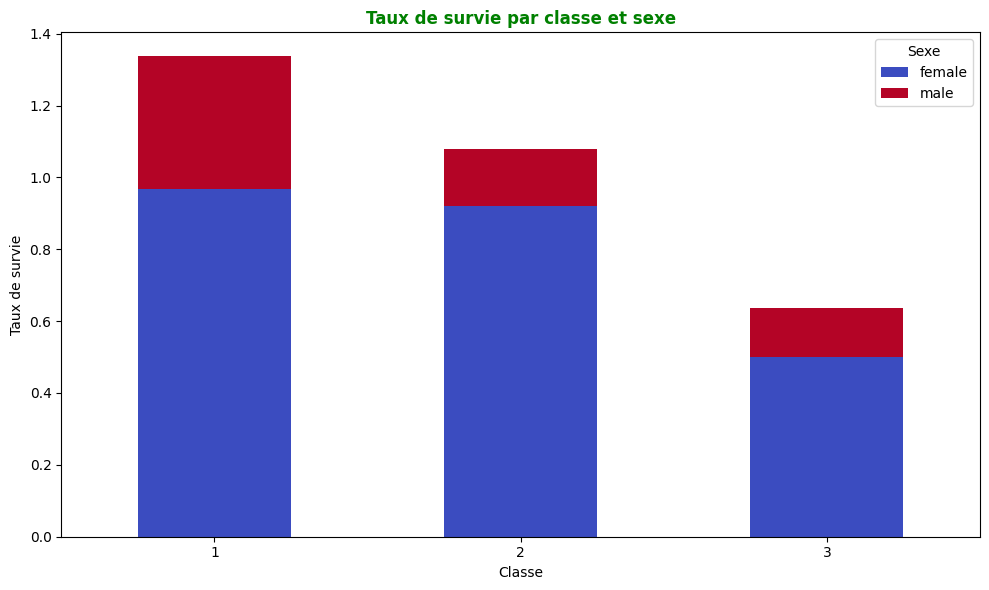

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
survival_rate = train.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
survival_rate.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)

plt.title("Taux de survie par classe et sexe", fontweight = 'bold', color = 'green')
plt.xlabel("Classe")
plt.ylabel("Taux de survie")
plt.legend(title="Sexe")
plt.xticks(rotation=0, ha='center')
#plt.grid(True)
plt.tight_layout()
plt.show()

---

### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**a) <ins>Conclusion sur les résultats obtenus sur le graphique subplots:**</ins></span></span>

*Le graphique montre le taux de survie des passagers du Titanic, distingué par classe (Pclass) et sexe (Sex).*

- Les passagers de première classe (Pclass=1) ont un taux de survie plus élevé, particulièrement les femmes, qui représentent une proportion significativement plus grande des survivants par rapport aux hommes. Ce taux est probablement lié à des priorités d'évacuation favorisant les femmes et les enfants dans les premières classes.

- Les passagers de deuxième classe (Pclass=2) ont un taux de survie moins élevé que ceux de première classe, mais celui-ci est toujours plus élevé pour les femmes que pour les hommes, bien que la différence soit moins marquée que dans la première classe.

- Les passagers de troisième classe (Pclass=3) ont un taux de survie beaucoup plus faible. Les hommes de troisième classe ont les taux de survie les plus bas, tandis que les femmes, bien que survivantes dans une proportion plus élevée, ont un taux de survie qui reste relativement bas par rapport aux autres classes.

En résumé, la classe sociale et le sexe jouent un rôle important dans les chances de survie, avec les femmes de première classe ayant les meilleures chances. Les hommes, particulièrement ceux de troisième classe, avaient les plus faibles chances de survie.

**Soulignons que le taux de survie est calculé en fonction de ces deux critères, ce qui permet de mieux comprendre comment ces facteurs ont influencé les chances de survie pendant la tragédie du Titanic.**

---

## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**2. <ins>Graphique de distribution des âges**</ins></span></span>

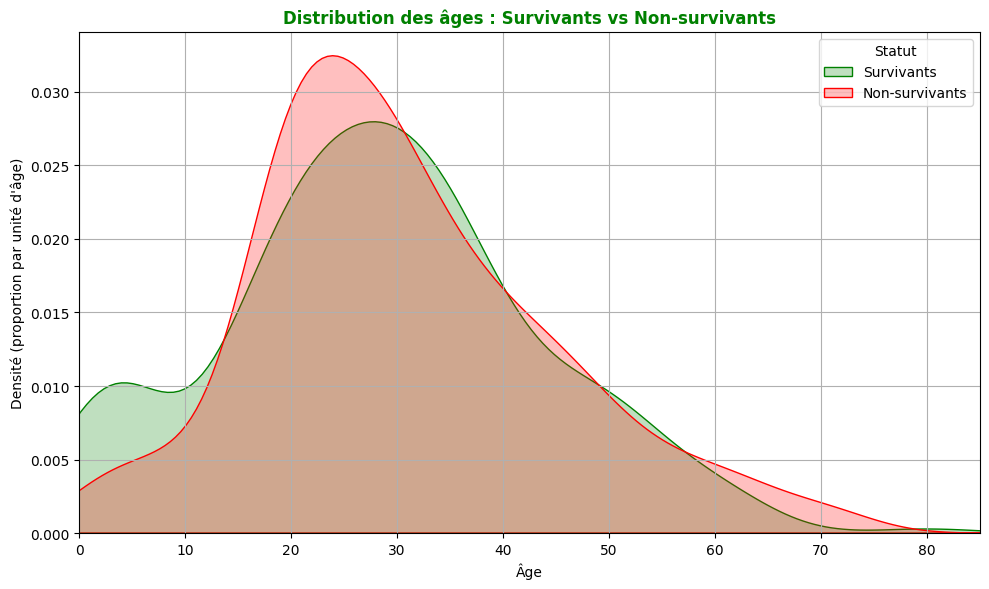

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train.loc[train['Survived'] == 1, 'Age'], fill=True, label="Survivants", color="green")
sns.kdeplot(train.loc[train['Survived'] == 0, 'Age'], fill=True, label="Non-survivants", color="red")
plt.title("Distribution des âges : Survivants vs Non-survivants", fontweight = 'bold', color = 'green')
plt.xlabel("Âge")
plt.ylabel("Densité (proportion par unité d'âge)")
plt.legend(title="Statut")

# Limiter l'axe X à une plage réaliste
plt.xlim(0, train['Age'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

---

### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**b) <ins>Conclusion sur les résultats obtenus sur le graphique KDE:**</ins></span></span>
*Le graphique présente la distribution des âges des survivants et des non-survivants du Titanic sous forme de courbes de densité (KDE), avec deux courbes distinctes :*

- Les survivants (en vert) ont une distribution d'âges qui montre une densité plus élevée chez les jeunes adultes et les enfants, avec un pic autour de 20 à 30 ans. Cela suggère qu'un grand nombre de survivants étaient jeunes, probablement en raison des priorités d'évacuation qui favorisaient les femmes et les enfants. On peut aussi observer une plus faible proportion de personnes âgées parmi les survivants.

- Les non-survivants (en rouge) ont une courbe de densité qui montre une proportion plus élevée de personnes plus âgées, bien que la distribution soit plus étalée. Cela pourrait refléter des circonstances où les personnes plus âgées avaient moins de chances de survivre, peut-être en raison de l'incapacité d'évacuer ou d'autres facteurs de vulnérabilité.

En général, la courbe des survivants est centrée sur des âges plus jeunes, tandis que celle des non-survivants est plus dispersée et montre une plus grande proportion d'adultes plus âgés.

**La densité représente la proportion relative des individus par unité d'âge, ce qui permet de comparer plus facilement les groupes en termes de distribution de l'âge. La normalisation des densités (pour que l'aire totale soit égale à 1) permet d'interpréter les courbes comme des distributions de probabilité.**

---

* ## <span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Points importants à noter :**</span></span></span>

    - ### <span style='font-family:"Times New Roman"'> <span styel=''>Ce modèle servira de baseline</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>Il nous permet de comprendre le taux de survie réel</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>La précision sera probablement très basse (car tout le monde est prédit comme non survivant)</span></span>

<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

# <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**3) <ins>ITERATION 1**</ins></span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**a) Feature de base :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**classe**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**sexe**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**âge**</span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**b) Première modélisation**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**c) Amelioration du score**</span></span>

* ## ⚠️ <span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Ce script fait plusieurs choses :**

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Prétraitement des données</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Encodage des variables catégorielles</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Gestion des valeurs manquantes</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Mise à l'échelle des features</span></span>
  
    * ### <span style='font-family:"Times New Roman"'> <span styel=''>Modèle de régression logistique</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>Entraînement sur une partie des données</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>Validation sur un autre ensemble</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>Calcul de la précision</span></span>

    * ### <span style='font-family:"Times New Roman"'> <span styel=''>Analyse des résultats</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>Importance des features</span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>Taux de survie par classe et sexe</span></span>
        
    * ### <span style='font-family:"Times New Roman"'> <span styel=''>Génération d'un fichier de soumission Kaggle</span></span>

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Prétraitement des données**</ins></span></span>

In [20]:
def preprocess_data(df, is_train=True):
    # Sélection des features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    
    # Copie du dataframe
    data = df.copy()
    
    # Encodage des variables catégorielles
    le = LabelEncoder()
    data['Sex'] = le.fit_transform(data['Sex'])
    data['Embarked'] = le.fit_transform(data['Embarked'].fillna(data['Embarked'].mode()[0]))
    
    # Imputation des valeurs manquantes
    imputer = SimpleImputer(strategy='median')
    X = data[features]
    X = pd.DataFrame(imputer.fit_transform(X), columns=features)
    
    if is_train:
        y = data['Survived']
        return X, y
    return X

### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Préparer les données d'entraînement**</ins></span></span>

In [21]:
X_train, y_train = preprocess_data(train)

### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Division en sets d'entraînement et de validation**</ins></span></span>

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Mise à l'échelle des features**</ins></span></span>

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Entraînement du modèle de régression logistique**</ins></span></span>

In [24]:
model_logreg = LogisticRegression(random_state=42, max_iter=1000)
model_logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Prédictions et évaluation**</ins></span></span>

In [25]:
y_pred_logreg = model_logreg.predict(X_val_scaled)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)

In [26]:
print("\nRésultats du modèle de Régression Logistique :")
print(f"Précision : {accuracy_logreg:.2%}")
print("\nRapport de classification :")
print(classification_report(y_val, y_pred_logreg))


Résultats du modèle de Régression Logistique :
Précision : 79.89%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Importance des features**</ins></span></span>

In [27]:
#feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

#feature_importance = pd.DataFrame({
 #   'feature': X_train.columns,
  #  'importance': np.abs(model.coef_[0])
#})

In [28]:
#print("\nImportance des features :")
#print(feature_importance.sort_values('importance', ascending=False))

### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Prédictions sur le jeu de test**</ins></span></span>

In [29]:
#X_test = preprocess_data(test, is_train=False)
#X_test_scaled = scaler.transform(X_test)
#test_predictions = model.predict(X_test_scaled)

### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Création du fichier de soumission**</ins></span></span>

In [30]:
#submission = pd.DataFrame({
 #   'PassengerId': test['PassengerId'],
  #  'Survived': test_predictions
#})

In [31]:
#submission.to_csv('data/logistic_regression_submission.csv', index=False)

### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

<span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''><ins>**Analyse exploratoire rapide**</ins></span></span>

In [32]:
print("\nAnalyse des survivants par classe :")
survival_by_class = train.groupby('Pclass')['Survived'].mean()
print(survival_by_class)


Analyse des survivants par classe :
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

In [33]:
print("\nAnalyse des survivants par sexe :")
survival_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_by_sex)


Analyse des survivants par sexe :
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

In [34]:
print("\nAnalyse des survivants par age :")
survival_by_age = train.groupby('Age')['Survived'].mean()
print(survival_by_age)


Analyse des survivants par age :
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64


### 🚧🚧🚧 <span style='background:yellow'><span style="color:orange"> ***Ici il y aura une explication du bloc***</span></span> 🚧🚧🚧

---

# <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**1. <ins>Taux de survie par classe**</ins></span></span>

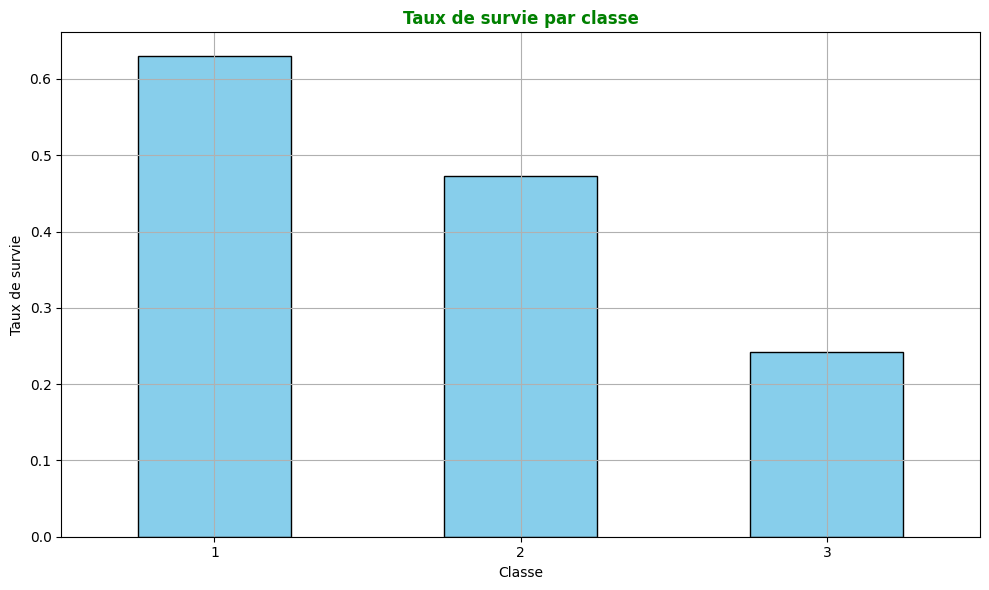

In [35]:
plt.figure(figsize=(10, 6))
survival_by_class.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Taux de survie par classe", fontweight = 'bold', color = 'green')
plt.xlabel("Classe")
plt.ylabel("Taux de survie")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


---

### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**a) <ins>Conclusion sur les résultats obtenus :**</ins></span></span>

*Le graphique présente le taux de survie par classe (Pclass) sous forme de barres.*

- Classe 1 (Première classe) : Les passagers de première classe affichent un taux de survie significativement plus élevé que les autres classes. Cela reflète le privilège accordé aux passagers de première classe lors des procédures d'évacuation.

- Classe 2 (Deuxième classe) : Le taux de survie des passagers de deuxième classe est inférieur à celui de la première classe, mais reste nettement meilleur que celui de la troisième classe. Les passagers de deuxième classe bénéficiaient sans doute d’un accès modéré aux canots de sauvetage.

- Classe 3 (Troisième classe) : Les passagers de troisième classe ont le taux de survie le plus faible. Cela pourrait être dû à des facteurs tels que leur emplacement dans le navire (plus éloigné des canots de sauvetage) ou leur statut socio-économique limitant leur priorité lors de l'évacuation.

**Le graphique met en évidence une corrélation claire entre la classe sociale et les chances de survie. Plus la classe est élevée, plus les chances de survie sont importantes. Cela illustre l'inégalité des opportunités de survie lors de la catastrophe, les passagers des classes supérieures bénéficiant d'un accès privilégié aux ressources de sauvetage.**

---

# <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**2. <ins>Taux de survie par sexe**</ins></span></span>


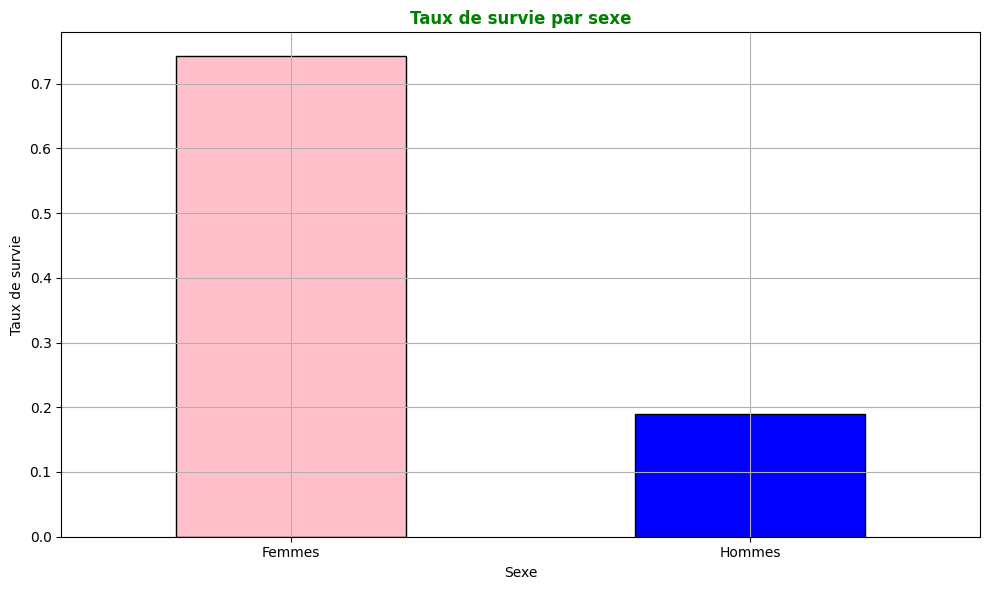

In [36]:
plt.figure(figsize=(10, 6))
survival_by_sex.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')
plt.title("Taux de survie par sexe", fontweight = 'bold', color = 'green')
plt.xlabel("Sexe")
plt.ylabel("Taux de survie")
plt.xticks([0, 1], labels=['Femmes', 'Hommes'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


---


### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**b) <ins>Conclusion sur les résultats obtenus :**</ins></span></span>

*Le graphique présente le taux de survie en fonction du sexe sous forme de barres.*

- Femmes : Le taux de survie des femmes est très élevé, ce qui reflète la priorité donnée aux femmes (et aux enfants) lors des évacuations, conformément à la règle "les femmes et les enfants d'abord".

- Hommes : Le taux de survie des hommes est nettement plus bas que celui des femmes. Cela illustre qu’ils étaient souvent relégués au second plan dans les efforts d'évacuation, probablement en raison de l'ordre d'évacuation.

**Le graphique met en évidence une forte différence dans les chances de survie entre les sexes. Les femmes avaient une probabilité significativement plus élevée de survivre que les hommes, soulignant les inégalités liées aux priorités d'évacuation. Cela reflète les normes sociales de l'époque, où les femmes et les enfants étaient généralement protégés en priorité lors des situations d'urgence.**

---

# <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**3. <ins>Distribution des âges : Survivants vs Non-survivants**</ins></span></span>

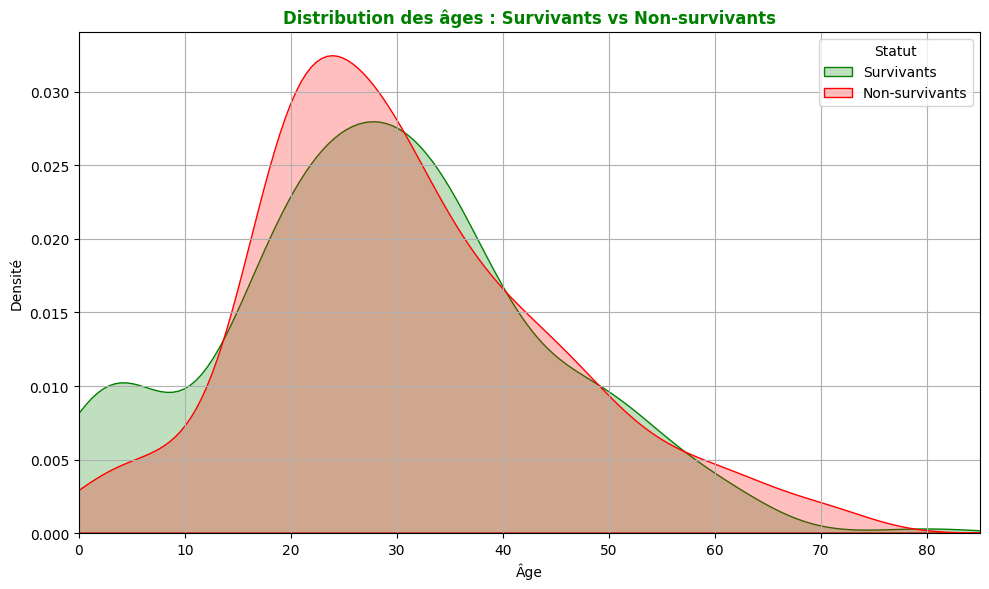

In [37]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train.loc[train['Survived'] == 1, 'Age'], fill=True, label="Survivants", color="green")
sns.kdeplot(train.loc[train['Survived'] == 0, 'Age'], fill=True, label="Non-survivants", color="red")
plt.title("Distribution des âges : Survivants vs Non-survivants", fontweight = 'bold', color = 'green')
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.legend(title="Statut")
plt.xlim(0, train['Age'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

---

### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**c) <ins>Conclusion sur les résultats obtenus :**</ins></span></span>

*Le graphique montre la distribution des âges pour les survivants (en vert) et les non-survivants (en rouge) sous forme de courbes de densité.*

- Survivants : La densité est plus élevée chez les jeunes enfants et les jeunes adultes (surtout entre 20 et 30 ans), ce qui indique que ces groupes avaient des chances plus importantes de survivre. Cela peut être expliqué par la priorité donnée aux enfants et aux femmes lors des évacuations.

- Non-survivants : La courbe est plus dispersée et montre une densité significative parmi les adultes de tous âges. Cela reflète que les hommes adultes (notamment ceux en troisième classe) représentaient une large proportion des victimes.

### Analyse globale :
- Les jeunes âges (en particulier les enfants) sont surreprésentés parmi les survivants, ce qui correspond aux priorités d’évacuation.
- Les adultes sont répartis de manière plus équilibrée entre survivants et non-survivants, mais leur proportion est plus forte parmi les victimes.
- La faible densité des personnes âgées dans les deux courbes montre qu’elles étaient moins nombreuses sur le Titanic, mais leur taux de survie restait bas.

**Le graphique met donc en évidence que l’âge était un facteur important dans les chances de survie, les jeunes et les enfants ayant bénéficié d’un avantage significatif.**

---

# <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**4. <ins>Répartition des tarifs payés par classe**</ins></span></span>

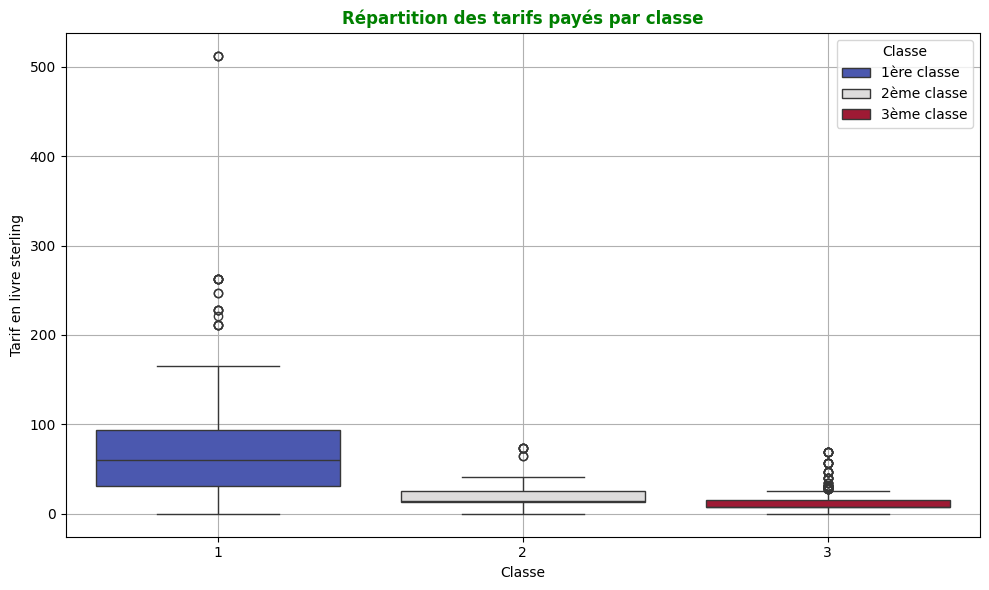

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train, hue='Pclass', palette='coolwarm', dodge=False)
plt.title("Répartition des tarifs payés par classe", fontweight = 'bold', color = 'green')
plt.xlabel("Classe")
plt.ylabel("Tarif en livre sterling")
plt.legend(title="Classe", labels=["1ère classe", "2ème classe", "3ème classe"], loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

---

### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**d) <ins>Conclusion sur les résultats obtenus :**</ins></span></span>

*Le graphique présente la répartition des tarifs payés (Fare) par classe (Pclass) sous forme de boîte à moustaches (boxplot).*

- 1ère classe (Pclass=1) : Les passagers de première classe ont payé des tarifs nettement plus élevés, comme le montre la médiane et la large dispersion des valeurs. Certains tarifs atteignent des montants très élevés (présence d’outliers), indiquant le luxe et les privilèges associés à cette classe.

- 2ème classe (Pclass=2) : Les tarifs payés en deuxième classe sont intermédiaires, avec une médiane beaucoup plus basse que celle de la première classe. La dispersion est également plus limitée, suggérant une relative homogénéité dans les prix des billets.

- 3ème classe (Pclass=3) : Les passagers de troisième classe ont payé les tarifs les plus bas, avec une médiane nettement inférieure aux autres classes. La dispersion est également réduite, reflétant un accès plus restreint aux options coûteuses.

**Le graphique illustre une relation claire entre le tarif payé et la classe : plus la classe est élevée, plus le tarif payé est important. Cela reflète la séparation sociale marquée à bord du Titanic, où les passagers de première classe jouissaient des meilleures commodités moyennant des tarifs beaucoup plus élevés, tandis que ceux de troisième classe voyageaient dans des conditions plus modestes avec des coûts réduits.**

**Les variations au sein de chaque classe (notamment les outliers en première classe) pourraient refléter des différences dans la durée du voyage, les itinéraires, ou des services spécifiques inclus dans certains billets.**

---

# <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**5. <ins>Heatmap des corrélations**</ins></span></span>

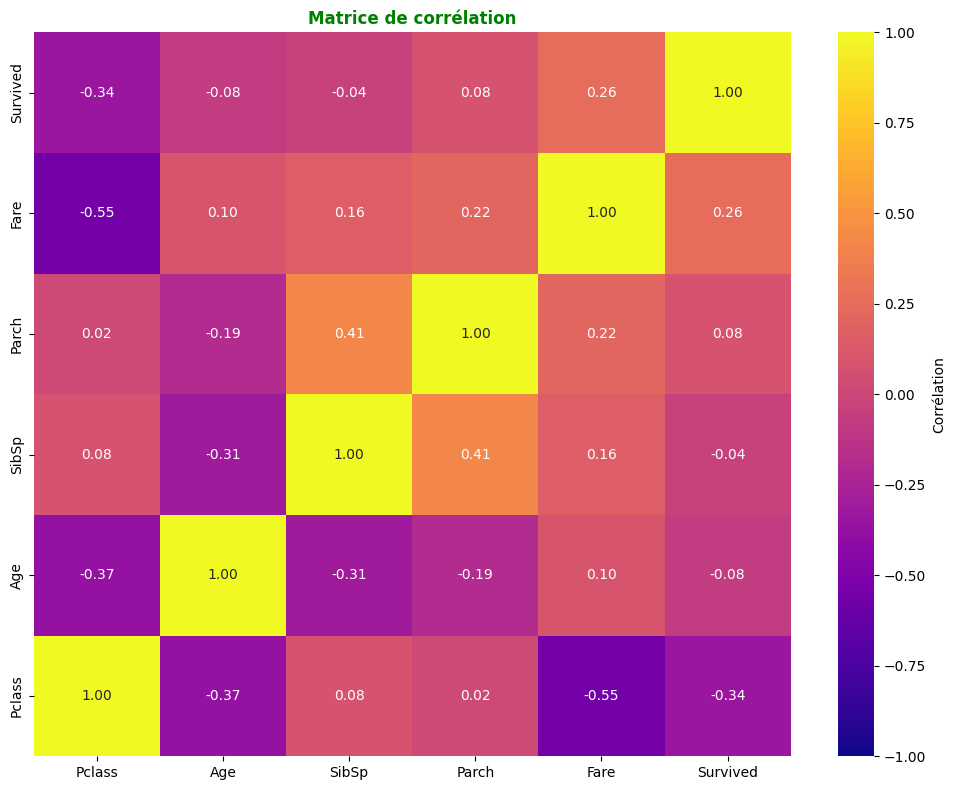

In [39]:
plt.figure(figsize=(10, 8))
corr = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

sns.heatmap(
    corr, 
    annot=True, 
    cmap='plasma', 
    fmt='.2f', 
    vmin=-1, vmax=1,
    cbar_kws={'label': 'Corrélation'}
)

plt.title("Matrice de corrélation", fontweight='bold', color='green')
plt.gca().invert_yaxis() # Inverser l'ordre des mots sur l'axe Y
plt.tight_layout()
plt.show()

---

### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**e) <ins>Conclusion sur les résultats obtenus :**</ins></span></span>

*Le graphique présente une matrice de corrélation des variables numériques du dataset, avec des coefficients de corrélation allant de -1 à 1 :*

### Relation avec Survived (taux de survie) :

- <span style="cursor: help; color: blue; border-bottom: 3px dotted blue;" title="Classe de cabine des passagers (1 = première, 3 = troisième).">Pclass</span> : Corrélation négative modérée (~ -0.34), indiquant que les passagers des classes inférieures avaient moins de chances de survivre.
- <span style="cursor: help; color: blue; border-bottom: 3px dotted blue;" title="Tarif payé par le passager pour son billet.">Fare</span> : Corrélation positive (~ 0.26), montrant que les passagers ayant payé des tarifs plus élevés avaient plus de chances de survivre (souvent liés aux classes supérieures).
- Age : Corrélation faible et légèrement négative (~ -0.08), suggérant que l’âge seul n’est pas un facteur déterminant, bien qu’il ait une influence indirecte.
- <span style="cursor: help; color: blue; border-bottom: 3px dotted blue;" title="Nombre de frères, sœurs ou conjoints à bord avec le passager.">SibSp</span>  (Nombre de frères/sœurs/conjoints) et <span style="cursor: help; color: blue; border-bottom: 3px dotted blue;" title="Nombre de parents ou enfants à bord avec le passager.">Parch</span>: Corrélations faibles positives (~ 0.04 et 0.08), indiquant un faible lien entre le fait de voyager en famille et les chances de survie.

### Relations entre les autres variables :

- Fare et Pclass : Corrélation négative forte (~ -0.55), confirmant que les passagers des classes inférieures payaient des tarifs significativement plus bas.
Age et Pclass : Corrélation faible négative (~ -0.37), indiquant que les passagers plus jeunes étaient plus souvent en classes inférieures.
- SibSp et Parch : Corrélation positive (~ 0.41), montrant qu’un plus grand nombre de compagnons de voyage en famille est souvent lié.

**La matrice de corrélation met en évidence les liens entre les différentes variables, confirmant certaines relations connues (par exemple, l’impact de la classe et du tarif sur la survie). Cependant, les coefficients modérés ou faibles suggèrent que les chances de survie sont influencées par une combinaison complexe de plusieurs facteurs (classe, tarif, sexe, âge, etc.) plutôt que par une seule variable dominante.**

---

# <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**6.<ins> Importance des features (graphique)**</ins></span></span>

In [40]:
#plt.figure(figsize=(10, 6))
#sns.barplot(
 #   x='importance', y='feature', 
  #  data=feature_importance.sort_values('importance', ascending=False), 
   # hue='importance', 
    #palette='coolwarm'
#)
#plt.title("Importance des features (Régression logistique)", fontweight = 'bold', color = 'green')
#plt.xlabel("Importance absolue")
#plt.ylabel("Feature")
#plt.grid(True)
#plt.tight_layout()
#plt.show()

---

### <span style="color: #2e6f40"><span style='font-family:"Times New Roman"'> <span styel=''>**f) <ins>Conclusion sur les résultats obtenus :**</ins></span></span>

*Le graphique présente l'importance des features utilisées dans un modèle de régression logistique pour prédire la survie (Survived) des passagers.*

### Features les plus importantes :

Les caractéristiques les mieux classées (avec des valeurs d'importance absolue élevées) jouent un rôle déterminant dans la prédiction. Par exemple, des variables comme Pclass (classe sociale), Fare (tarif payé), ou Sex (sexe) sont souvent parmi les plus influentes pour ce type de modèle.

### Features secondaires :

Les variables ayant une importance plus faible, comme SibSp (nombre de frères/sœurs/conjoints) ou Parch (nombre de parents/enfants), contribuent de manière moindre au modèle, bien qu'elles puissent fournir un contexte supplémentaire.

**Ce graphique met en lumière les contributions relatives de chaque variable au modèle prédictif. Les variables liées au statut socio-économique (Pclass, Fare) et au sexe (priorités lors de l’évacuation) se révèlent être des facteurs clés, ce qui est cohérent avec les analyses précédentes. Les variables ayant moins d'importance, comme la composition familiale (SibSp, Parch), jouent un rôle plus modeste mais peuvent améliorer légèrement les prédictions globales.**

**Cette visualisation permet d'orienter des analyses plus approfondies ou des ajustements sur les données pour améliorer la performance du modèle.**

---

* ## <span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Ce script fait plusieurs choses :**</span></span></span>

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Amélioration significative par rapport au modèle précédent</span></span>
        
    * ### <span style='font-family:"Times New Roman"'> <span styel=''>Compréhension de l'impact des différentes features</span></span>

<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

# <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**4) <ins>ITERATION 2**</ins></span></span>

* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**a) Ingénierie de features plus avancée**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**b) Capture des interactions non-linéaires**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**c) Features enrichies :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Taille de la famille**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Titre**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Catégorisation de l'âge**</span>


---

* ## ⚠️<span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Les principales améliorations de cette version :**</span></span></span>

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Ingénierie de features avancée :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Taille de famille</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Titre de la personne</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Deck de la cabine</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Détection des enfants</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Détection des passagers seuls</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Utilisation du Random Forest :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Algorithme plus puissant que la régression logistique</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Capture mieux les interactions non linéaires</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Validation croisée :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Évalue la stabilité du modèle</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Donne une estimation plus robuste des performances</span></span></span></span></span></span>


    - - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Analyse de l'importance des features

---

In [41]:
# Fonction d'ingénierie de features
def engineer_features(df, is_train=True):
    data = df.copy()
    
    # Features existantes
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    
    # Encodage du sexe
    le_sex = LabelEncoder()
    data['Sex'] = le_sex.fit_transform(data['Sex'])
    
    # Encodage de l'embarquement
    le_embarked = LabelEncoder()
    data['Embarked'] = le_embarked.fit_transform(data['Embarked'].fillna(data['Embarked'].mode()[0]))
        
    # 1. Taille de famille
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    
    # 2. Titre de la personne
    data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    # Remplacer les titres rares par 'Rare'
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                          'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare').infer_objects(copy=False)
    data['Title'] = le_sex.fit_transform(data['Title'].fillna('Rare'))
    
    # 3. Deck (première lettre de la cabine)
    data['Deck'] = data['Cabin'].str[0].fillna('U')  # 'U' pour Unknown
    le_deck = LabelEncoder()
    data['Deck'] = le_deck.fit_transform(data['Deck'])
    
    # 4. Feature binaire pour les enfants
    data['IsChild'] = (data['Age'] <= 16).astype(int)
    
    # 5. Feature binaire pour les passagers seuls
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
    
    # Imputation des valeurs manquantes
    features_to_impute = ['Age', 'Fare']
    imputer = SimpleImputer(strategy='median')
    data[features_to_impute] = imputer.fit_transform(data[features_to_impute])
    
    # Sélection finale des features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 
                'FamilySize', 'Title', 'Deck', 'IsChild', 'IsAlone']
    
    X = data[features]
    
    if is_train:
        y = data['Survived']
        return X, y
    return X

# Préparation des données pour Random Forest
X_rf, y_rf = engineer_features(train)

# Division en ensemble d'entraînement et de validation avec stratification
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)

# Mise à l'échelle des features
scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train_rf)
X_val_scaled_rf = scaler_rf.transform(X_val_rf)

# Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=5, 
    min_samples_split=5
)

# Validation croisée pour Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_scaled_rf, y_train_rf, cv=5)
print("Scores de validation croisée (Random Forest) :", cv_scores_rf)
print("Score moyen de validation croisée (Random Forest) : {:.2%}".format(cv_scores_rf.mean()))

# Entraînement final du Random Forest
rf_model.fit(X_train_scaled_rf, y_train_rf)

# Prédictions et évaluation du Random Forest
y_pred_rf = rf_model.predict(X_val_scaled_rf)
accuracy_rf = accuracy_score(y_val_rf, y_pred_rf)

print("\nRésultats du modèle Random Forest :")
print(f"Précision : {accuracy_rf:.2%}")
print("\nRapport de classification :")
print(classification_report(y_val_rf, y_pred_rf))

Scores de validation croisée (Random Forest) : [0.7972028  0.78321678 0.82394366 0.84507042 0.82394366]
Score moyen de validation croisée (Random Forest) : 81.47%

Résultats du modèle Random Forest :
Précision : 81.01%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



---

* ## <span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Résultats attendus :**</span></span></span>

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Amélioration de la précision</span></span></span>
    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Meilleure compréhension de l'impact des différentes caractéristiques</span></span></span>

<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

# <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**5) <ins>ITERATION 3 (XGBoost)**</ins></span></span>

* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**a) Algorythme de gradient boosting**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**b) Optimisation des hyperparamètre**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**c) Recherche aléatoirement des meilleurs paramètres**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**d) Feature plus sophistiqué**</span></span>

---

* ## ⚠️<span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Principales améliorations dans cette version :**</span></span></span>

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Utilisation de XGBoost</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Algorithme de boosting très performant</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Gère bien les interactions complexes</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Ingénierie de features plus sophistiquée :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Catégorisation de la taille de famille</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Extraction et regroupement des titres</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Catégorisation de la richesse</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Groupes d'âge</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Interaction classe-sexe</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Optimisation des hyperparamètres :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Recherche aléatoire pour trouver la meilleure configuration</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Validation croisée pour une estimation robuste</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Analyse détaillée de l'importance des features</span></span></span>

---

In [43]:
# Définition des hyperparamètres à tester pour XGBoost
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Création du modèle XGBoost sans 'use_label_encoder'
xgb_model = xgb.XGBClassifier(
    random_state=42, 
    eval_metric='logloss',
    n_jobs=-1
)

# Recherche aléatoire des meilleurs hyperparamètres
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Ajustement du modèle XGBoost
print("Début de la recherche des hyperparamètres avec RandomizedSearchCV (XGBoost)...")
random_search_xgb.fit(X_train_scaled_rf, y_train_rf)  # Utilisez y_train_rf au lieu de y_rf
print("Recherche des hyperparamètres terminée.\n")

# Meilleur modèle XGBoost
best_model_xgb = random_search_xgb.best_estimator_

# Prédictions et évaluation de XGBoost
y_pred_xgb = best_model_xgb.predict(X_val_scaled_rf)
accuracy_xgb = accuracy_score(y_val_rf, y_pred_xgb)

print("Meilleurs hyperparamètres (XGBoost) :", random_search_xgb.best_params_)
print(f"\nRésultats du modèle XGBoost :")
print(f"Précision : {accuracy_xgb:.2%}")
print("\nRapport de classification :")
print(classification_report(y_val_rf, y_pred_xgb))

Début de la recherche des hyperparamètres avec RandomizedSearchCV (XGBoost)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Recherche des hyperparamètres terminée.

Meilleurs hyperparamètres (XGBoost) : {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}

Résultats du modèle XGBoost :
Précision : 78.77%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       110
           1       0.84      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179



---

* ## <span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Résultats attendus :**</span></span></span>

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Amélioration significative de la précision</span></span></span>
    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Compréhension plus fine des facteurs de survie</span></span></span>

<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

# <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**6) <ins>ITERATION 4**</ins></span></span>

* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**a) Combinaison de plusieurs modèles**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**b) Méta-classificateur**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**c) Robustesse et précision maximum**</span></span>

* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**d) Techniques Clés d'Ingénierie de Features**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Encodage des variables catégorielles**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Imputation des valeurs manquantes**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Création des features dérivées**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Catégorisation non-linéaire**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Interaction entre variables**</span>

* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**e) Techniques de validation**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Split train/test**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Validation croisée**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Métriques :**</span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>**Accuracy**</span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>**Rapport de classification**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Éviter le surapprentissage**</span>

* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**f) Stratégie Kaggle**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Objectifs :**</span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>**78,9% accuracy**</span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>**80%-83% viser**</span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>**85% max**</span>
        - <span style='font-family:"Times New Roman"'> <span styel=''>**85%-100% cheat**</span>

* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**g) Principe fondamentaux**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Compréhension du contexte historique**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Exploration des données**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Créativité dans l'analyse**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Iteration multiple**</span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**Pas de solution immédiat parfait**</span>

---

* ## ⚠️<span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Points clés de cette dernière étape :**</span></span></span>

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Technique d'ensemble avancée (Stacking) :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Combinaison de plusieurs modèles</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Modèle de méta-classification (Logistic Regression)</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Ingénierie de features améliorée :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Création de features plus sophistiquées</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Mapping non linéaire pour certaines variables</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Utilisation de plusieurs algorithmes :</span></span></span>

        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Random Forest</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Gradient Boosting</span></span></span>
        - <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>XGBoost</span></span></span>


    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Analyse détaillée des probabilités</span></span></span>

---

In [44]:
# Définition des modèles de base pour l'Ensemble Stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', best_model_xgb)  # Utilisez le meilleur modèle XGBoost trouvé précédemment
]

# Optionnel: Ajout d'un modèle diversifié
# base_models.append(('svc', SVC(probability=True, random_state=42)))

# Initialiser les matrices pour les prédictions de niveau 2
n_train = X_train_scaled_rf.shape[0]  # 712
n_test = test.shape[0]                # 418
n_models = len(base_models)

level2_train = np.zeros((n_train, n_models))
level2_test = np.zeros((n_test, n_models))

# Charger et prétraiter les données de test
def preprocess_test_data(df):
    X_test_preprocessed = engineer_features(df, is_train=False)
    return X_test_preprocessed

X_test_preprocessed = preprocess_test_data(test)
X_test_scaled = scaler_rf.transform(X_test_preprocessed)

# Utiliser une validation croisée stratifiée pour générer les prédictions de niveau 2
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for i, (name, model) in enumerate(base_models):
    oof_preds = np.zeros(n_train)
    test_preds_fold = np.zeros((n_folds, n_test))
    
    print(f"Entraînement du modèle {name} avec {n_folds} plis...")
    
    for fold, (train_idx, valid_idx) in enumerate(kf.split(X_train_scaled_rf, y_train_rf)):
        X_tr, X_val_fold = X_train_scaled_rf[train_idx], X_train_scaled_rf[valid_idx]
        y_tr, y_val_fold = y_train_rf.iloc[train_idx], y_train_rf.iloc[valid_idx]
        
        # Entraîner le modèle sur ce fold
        model.fit(X_tr, y_tr)
        
        # Prédire sur le fold de validation (OOF)
        oof_preds[valid_idx] = model.predict_proba(X_val_fold)[:, 1]
        
        # Prédire sur le jeu de test et stocker les prédictions
        test_preds_fold[fold, :] = model.predict_proba(X_test_scaled)[:, 1]
    
    # Stocker les prédictions OOF dans level2_train
    level2_train[:, i] = oof_preds
    
    # Moyenne des prédictions sur le jeu de test à travers les folds
    level2_test[:, i] = test_preds_fold.mean(axis=0)
    
    print(f"Modèle {name} terminé.\n")

# Normalisation des prédictions de niveau 2
scaler_meta = StandardScaler()
level2_train = scaler_meta.fit_transform(level2_train)
level2_test = scaler_meta.transform(level2_test)

# Entraînement du méta-classificateur (Gradient Boosting)
meta_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(level2_train, y_train_rf)

# Prédictions finales sur le jeu de test
final_predictions = meta_classifier.predict(level2_test)

# Création du fichier de soumission
submission_stacked = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': final_predictions
})
submission_stacked.to_csv('data/stacked_ensemble_submission.csv', index=False)
print("Fichier de soumission créé : 'data/stacked_ensemble_submission.csv'")

# Générer les prédictions OOF pour le jeu de validation
level2_val = np.zeros((X_val_scaled_rf.shape[0], n_models))

for i, (name, model) in enumerate(base_models):
    # Entraîner le modèle sur tout le jeu de train
    model.fit(X_train_scaled_rf, y_train_rf)
    # Prédire sur le jeu de validation
    level2_val[:, i] = model.predict_proba(X_val_scaled_rf)[:, 1]

# Normaliser les prédictions de niveau 2 pour la validation
level2_val = scaler_meta.transform(level2_val)

# Prédictions du méta-classificateur sur le jeu de validation
val_predictions = meta_classifier.predict(level2_val)

# Évaluation du modèle empilé
print("\nRésultats du modèle empilé sur validation :")
print(classification_report(y_val_rf, val_predictions))

# Analyse des probabilités de survie
print("\nProbabilités de survie :")
survival_probs = meta_classifier.predict_proba(level2_test)[:, 1]
print(f"Moyenne des probabilités : {survival_probs.mean():.2%}")
print(f"Probabilité minimale : {survival_probs.min():.2%}")
print(f"Probabilité maximale : {survival_probs.max():.2%}")

# Calcul de la précision finale pour le modèle empilé
accuracy_stacked = accuracy_score(y_val_rf, val_predictions)
roc_auc = roc_auc_score(y_val_rf, meta_classifier.predict_proba(level2_val)[:, 1])

print(f"\n📊 Score final du modèle empilé (Précision sur l'ensemble de validation) : {accuracy_stacked:.2%}")
print(f"AUC-ROC : {roc_auc:.2f}")

Entraînement du modèle rf avec 5 plis...
Modèle rf terminé.

Entraînement du modèle gb avec 5 plis...
Modèle gb terminé.

Entraînement du modèle xgb avec 5 plis...
Modèle xgb terminé.

Fichier de soumission créé : 'data/stacked_ensemble_submission.csv'

Résultats du modèle empilé sur validation :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Probabilités de survie :
Moyenne des probabilités : 43.43%
Probabilité minimale : 1.32%
Probabilité maximale : 98.80%

📊 Score final du modèle empilé (Précision sur l'ensemble de validation) : 82.12%
AUC-ROC : 0.83


---

* ## <span style="color: red"><span style='font-family:"Times New Roman"'> <span styel=''>**Objectifs atteints :**</span></span></span>

    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Maximiser la précision de prédiction</span></span></span>
    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Capture des interactions complexes</span></span></span>
    - ###  <span style='font-family:"Times New Roman"'> <span styel=''><span style='font-family:"Times New Roman"'> <span styel=''>Réduction du risque de surapprentissage</span></span></span>

<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

# <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**7) <ins>RESULTAT ATTENDU**</ins></span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**1) De base :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**~62%**</span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**2) Regression logistique :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**~75%**</span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**3) Random forest :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**~78%-80%**</span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**4) XGBoost :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**80%-82%**</span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**5) Ensemble :**</span></span>
    - ### <span style='font-family:"Times New Roman"'> <span styel=''>**82%-85%**</span>

In [45]:
print("--------------------------------------------RÉSUMÉ DES SCORES---------------------------------------------------")
print(f"\nRÉCAPITULATIF DES PERFORMANCES :")

print(f"\nÉTAPE 0 - Score de Base :")
print(f"📊 Score final du modèle : {baseline_accuracy:.2%}")

print(f"\nÉTAPE 1 - Régression Logistique :")
print(f"📊 Score final du modèle (Précision sur l'ensemble de validation) : {accuracy_logreg:.2%}")

print(f"\nÉTAPE 2 - Random Forest :")
print(f"📊 Score final du modèle (Précision sur l'ensemble de validation) : {accuracy_rf:.2%}")

print(f"\nÉTAPE 3 - XGBoost :")
print(f"📊 Score final du modèle (Précision sur l'ensemble de validation) : {accuracy_xgb:.2%}")

print(f"\nÉTAPE 4 - Ensemble Stacking :")
print(f"📊 Score final du modèle (Précision sur l'ensemble de validation) : {accuracy_stacked:.2%}")
print(f"AUC-ROC : {roc_auc:.2f}")

print(f"\nPROGRESSION DES SCORES :")
print(f"{baseline_accuracy:.2%} → {accuracy_logreg:.2%} → {accuracy_rf:.2%} → {accuracy_xgb:.2%} → {accuracy_stacked:.2%}")

print(f"\nNote : Le score de l'étape 1 ({accuracy_logreg:.2%}) est supérieur aux attentes (~75%), ce qui indique une excellente performance de la Régression Logistique.")
print("--------------------------------------------FIN DU RÉSUMÉ---------------------------------------------------")

--------------------------------------------RÉSUMÉ DES SCORES---------------------------------------------------

RÉCAPITULATIF DES PERFORMANCES :

ÉTAPE 0 - Score de Base :
📊 Score final du modèle : 61.62%

ÉTAPE 1 - Régression Logistique :
📊 Score final du modèle (Précision sur l'ensemble de validation) : 79.89%

ÉTAPE 2 - Random Forest :
📊 Score final du modèle (Précision sur l'ensemble de validation) : 81.01%

ÉTAPE 3 - XGBoost :
📊 Score final du modèle (Précision sur l'ensemble de validation) : 78.77%

ÉTAPE 4 - Ensemble Stacking :
📊 Score final du modèle (Précision sur l'ensemble de validation) : 82.12%
AUC-ROC : 0.83

PROGRESSION DES SCORES :
61.62% → 79.89% → 81.01% → 78.77% → 82.12%

Note : Le score de l'étape 1 (79.89%) est supérieur aux attentes (~75%), ce qui indique une excellente performance de la Régression Logistique.
--------------------------------------------FIN DU RÉSUMÉ---------------------------------------------------


<span style="color: #2e6f40">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</span>

# <span style="color: darkred"><span style='font-family:"Times New Roman"'> <span styel=''>**8) <ins>CONSEIL GÉNÉRAUX**</ins></span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**1) Documenter**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**2) Visualiser les insights**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**3) Créativité**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**4) Tester plusieurs approche**</span></span>
* ## <span style="color: darkblue"><span style='font-family:"Times New Roman"'> <span styel=''>**5) Apprendre de chaque iteration**</span></span>
